Add a slide bar to the graph to change s vals.
See if you can turn the circle into a heatmap with hot corresponding to values far from the circle
Don't map lines, just the heat.

Horribly inaccurate because there is only 100 terms in the partial sum, regardless of the s value. This is changed in GFF_compare

interactive(children=(FloatSlider(value=1.15, description='s', max=2.0, min=0.3), Output()), _dom_classes=('wi…

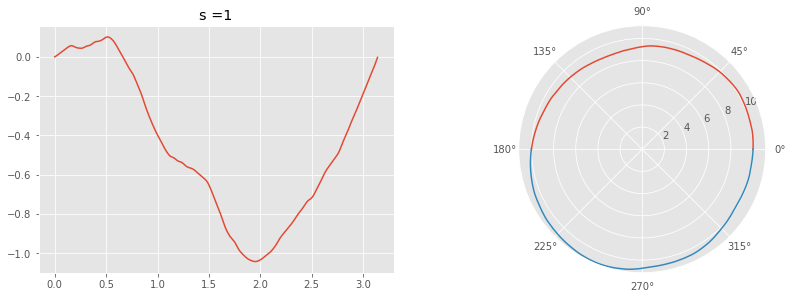

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
numterms = 100 # number of terms in partial sum
theta1 = np.arange(0,np.pi,0.01) # time grid


theta =  np.append(theta1, -theta1)
np.random.seed(6) # not sure that this does anything. Was an attempt to keep z vals the same between trials
Zs = []
Zs.extend(np.random.default_rng().normal(0, 1, numterms) for i in range(len(theta1))) # creates rrandom variables


@interact(s=(0.3, 2))
def graphAll(s):
    def gff_partial_sum(Z,n,s,t):
        
        # construct a vector of the coefficients of the sum
    #     coeff = [(np.sin(m*t) + np.cos(m *t))/m**(2*s) for m in range(1,n+1)]
        coeff = [np.sin(m*t)/m**(2*s) for m in range(1,n+1)]

        i = int(t *100) # index for each random variable in the vector

        return Z[0].dot(coeff)

    # construct a random vector of i.i.d standard normals of size n

    vals1 = np.array(
        [gff_partial_sum(Zs,numterms, s,t) for t in theta1]
    )
    vals = np.append(vals1,-vals1)

    # Plotting the GFF on two axes - both polar and normal.
    plt.style.use('ggplot')

    fig = plt.figure(figsize=(14,10))
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222, projection='polar')

    ax1.plot(theta1,vals1) # plots just one side of the circle
    ax2.plot(theta1,10 +vals1) # plots top half of circle red
    ax2.plot(-theta1,10-vals1) # plots bottom half of circle
    plt.show()
    
    
def gff_partial_sum(Z,n,s,t):

    # construct a vector of the coefficients of the sum
#     coeff = [(np.sin(m*t) + np.cos(m *t))/m**(2*s) for m in range(1,n+1)]
    coeff = [np.sin(m*t)/m**(2*s) for m in range(1,n+1)]

    return Z[0].dot(coeff)

#     numterms = 200 # number of terms in partial sum
s2 = 1 # s value
# construct a random vector of i.i.d standard normals of size n

vals1 = np.array(
    [gff_partial_sum(Zs,numterms, s2,t) for t in theta1]
)
vals = np.append(vals1,-vals1)

# Plotting the GFF on two axes - both polar and normal.
plt.style.use('ggplot')

fig2 = plt.figure(figsize=(14,10))
ax3 = plt.subplot(223)
ax3.set_title("s =" + str(s2))
ax4 = plt.subplot(224, projection='polar')

ax3.plot(theta1,vals1)
ax4.plot(theta1,10 +vals1)
ax4.plot(-theta1,10-vals1)
plt.show()